np.random.permuatation()  打亂序列  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


['user_id:6040', 'movie_id:3952', 'ratings:1000209']
rating mean:3.5816


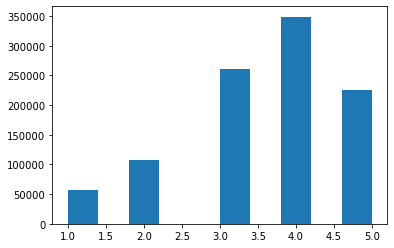

In [2]:
ratings = pd.read_csv("./data/ratings.dat", sep="::", engine="python", names=["user_id","movie_id","rating","timestamp"])
n_users = np.max(ratings["user_id"])
n_movies = np.max(ratings["movie_id"])
print(["user_id:{}".format(n_users),"movie_id:{}".format(n_movies),"ratings:{}".format(len(ratings))])
print("rating mean:{:.4f}".format(np.mean(ratings["rating"])))
plt.hist(ratings["rating"])
plt.show()

model1 input : User ID  
model2 input : Movie ID  
output : 預測評分

In [18]:
output_dim = 128
input_1 = layers.Input(shape=(1,), name="input_1")
input_2 = layers.Input(shape=(1,), name="input_2")
embed_1 = layers.Embedding(input_dim=(n_users+1), output_dim=output_dim, input_length=1, name="embed_1")(input_1)
embed_2 = layers.Embedding(input_dim=(n_movies+1), output_dim=output_dim, input_length=1, name="embed_2")(input_2)
reshape_1 = layers.Reshape(target_shape=(output_dim,), name="reshape_1")(embed_1)
reshape_2 = layers.Reshape(target_shape=(output_dim,), name="reshape_2")(embed_2)

concate = layers.Concatenate(name="concate")([reshape_1,reshape_2])
x = layers.Dropout(rate=0.2, name="drop_1")(concate)
x = layers.Dense(units=output_dim, activation="relu", name="dense_1")(x)
x = layers.Dropout(rate=0.5, name="drop_2")(x)
x = layers.Dense(units=(output_dim/4), activation="relu", name="dense_2")(x)
x = layers.Dropout(rate=0.5, name="drop_3")(x)
x = layers.Dense(units=(output_dim/16), activation="relu", name="dense_3")(x)
x = layers.Dropout(rate=0.5, name="drop_4")(x)
output = layers.Dense(units=1, activation="linear", name="outputs")(x)

model = models.Model([input_1,input_2], output, name="rating_model")
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "rating_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embed_1 (Embedding)             (None, 1, 128)       773248      input_1[0][0]                    
__________________________________________________________________________________________________
embed_2 (Embedding)             (None, 1, 128)       505984      input_2[0][0]                    
_______________________________________________________________________________________

In [20]:
np.random.seed(13)
users = ratings["user_id"].values
movies = ratings['movie_id'].values
labels = ratings['rating'].values
# ran_index = np.random.permutation(len(users))
# users = users[ran_index]
# movies = movies[ran_index]
# labels = labels[ran_index]
x_train = [users, movies]
y_train = labels

history = model.fit(x_train, y_train, batch_size=1000, epochs=3, verbose=1)

Train on 1000209 samples
Epoch 1/3
1000209/1000209 [==============================] - 27s 27us/sample - loss: 2.6733 - accuracy: 0.0554
Epoch 2/3
1000209/1000209 [==============================] - 27s 27us/sample - loss: 1.8254 - accuracy: 0.0562
Epoch 3/3
1000209/1000209 [==============================] - 28s 28us/sample - loss: 1.3685 - accuracy: 0.0562


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

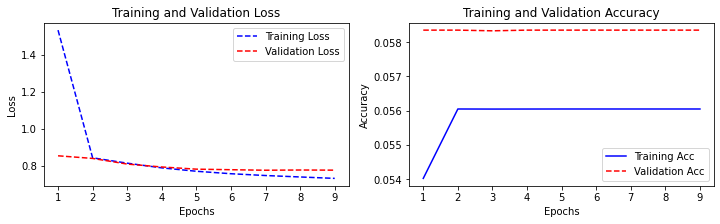

In [11]:
def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
        plt.subplot(1,2,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        epochs = range(1, len(acc)+1)
        plt.subplot(1,2,2)
        plt.plot(epochs, acc, "b-", label="Training Acc")
        plt.plot(epochs, val_acc, "r--", label="Validation Acc")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
        
visual_train_status(history)

In [22]:
i,j = 10,99
pred = model.predict([np.array([users[i]]), np.array([movies[j]])])

mse = model.evaluate(x=x_train, y=y_train, batch_size=128)
print(mse)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.8798649972497269, 0.05616226]


In [23]:
print(pred)

[[3.3372936]]
